# Data Mining Group Project on Wine Dataset

By,
Shanmukh Behara (ug8788),
Snigdha Enumulapally (xc2373),
Damoder Reddy Pannala (LZ7285),
Sri Samhitha Pallelamudi (ti6266),

# Objective
1)	Predicting Quality of wine
2)	Classification based on Wine Type


# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline  

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from pandas.plotting import scatter_matrix
from sklearn import neighbors
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.metrics import mean_absolute_error

# Reading Data

In [5]:
df=pd.read_csv('wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6491 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  Type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Data Exploration

In [6]:
#Data attributes
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type', 'quality'],
      dtype='object')

In [7]:
#Replacing space with '_' in column names
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type', 'quality'],
      dtype='object')

In [8]:
# Printing the number of rows and columns
print("Rows, columns: " + str(df.shape))

# First five rows of the dataset
df.head()

Rows, columns: (6497, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Type,quality
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,31.99840,0.99746,3.580179,0.669933,10.20102,White,5
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,17.99910,1.00030,3.160158,0.489951,9.50095,White,5
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,205.98970,0.99550,3.240162,0.429957,9.20092,Red,6
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,228.98855,0.99850,3.140157,0.489951,9.10091,Red,7
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,236.98815,0.99800,3.180159,0.489951,8.70087,Red,5


In [9]:
#Describing the data
df.describe()

#There is no column with SD '0'. So no need to drop a column.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6491.000000,6497.000000,6494.000000,6497.000000,6482.000000,6487.000000,6497.000000
mean,7.214586,0.339632,0.318649,5.443508,0.056031,30.535805,115.738941,0.994596,3.218662,0.531403,10.494394,5.818378
std,1.296304,0.164620,0.145325,4.758042,0.035032,17.756039,56.518925,0.002998,0.160795,0.148912,1.193098,0.873255
min,3.799620,0.079992,0.000000,0.600030,0.009000,1.000050,5.999700,0.987011,2.720136,0.219978,8.000800,3.000000
25%,6.399360,0.229977,0.250013,1.800090,0.037998,17.000850,76.996150,0.992241,3.110156,0.429957,9.500950,5.000000
50%,6.999300,0.289971,0.310016,3.000150,0.046998,29.001450,117.994100,0.994786,3.210161,0.509949,10.301030,6.000000
75%,7.699230,0.399960,0.390020,8.100405,0.064997,41.002050,155.992200,0.996890,3.320166,0.599940,11.301130,6.000000
max,15.898410,1.579842,1.660083,65.803290,0.610969,289.014450,439.978000,1.038876,4.010201,1.999800,14.901490,9.000000


In [10]:
#Describing dataset for both types of wine.
pd.set_option('display.max_columns', 500)
df.groupby("Type").describe()

fixed_acidity                                                          \
              count      mean       std      min      25%      50%      75%   
Type                                                                          
Red          4898.0  6.854102  0.843784  3.79962  6.29937  6.79932  7.29927   
White        1599.0  8.318805  1.740922  4.59954  7.09929  7.89921  9.19908   

                volatile_acidity                                          \
            max            count      mean       std       min       25%   
Type                                                                       
Red    14.19858           4898.0  0.278213  0.100784  0.079992  0.209979   
White  15.89841           1599.0  0.527768  0.179042  0.119988  0.389961   

                                    citric_acid                           \
            50%       75%       max       count      mean       std  min   
Type                                                                       
Red    0.259974  0.319968  1.099890      4898.0  0.334208  0.121026  0.0   
White  0.519948  0.639936  1.579842      1599.0  0.270989  0.194811  0.0   

                                              residual_sugar            \
            25%       50%       75%       max          count      mean   
Type                                                                     
Red    0.270014  0.320016  0.390020  1.660083         4898.0  6.391734   
White  0.090005  0.260013  0.420021  1.000050         1599.0  2.538932   

                                                                  chlorides  \
            std       min       25%      50%       75%        max     count   
Type                                                                          
Red    5.072311  0.600030  1.700085  5.20026  9.900495  65.803290    4898.0   
White  1.409999  0.900045  1.900095  2.20011  2.600130  15.500775    1599.0   

                                                                             \
           mean       std       min       25%       50%       75%       max   
Type                                                                          
Red    0.045770  0.021847  0.009000  0.035998  0.042998  0.049998  0.345983   
White  0.087462  0.047063  0.011999  0.069997  0.078996  0.089996  0.610969   

      free_sulfur_dioxide                                                    \
                    count       mean        std      min       25%      50%   
Type                                                                          
Red                4892.0  35.327400  17.011027  2.00010  23.00115  34.0017   
White              1599.0  15.876341  10.460957  1.00005   7.00035  14.0007   

                           total_sulfur_dioxide                         \
            75%        max                count        mean        std   
Type                                                                     
Red    46.00230  289.01445               4898.0  138.353739  42.495940   
White  21.00105   72.00360               1599.0   46.466094  32.894275   

                                                         density            \
           min       25%       50%        75%        max   count      mean   
Type                                                                         
Red    8.99955  107.9946  133.9933  166.99165  439.97800  4898.0  0.993928   
White  5.99970   21.9989   37.9981   61.99690  288.98555  1596.0  0.996645   

                                                                       pH  \
            std       min       25%       50%       75%       max   count   
Type                                                                        
Red    0.002990  0.987011  0.991623  0.993641  0.996000  1.038876  4898.0   
White  0.001889  0.989971  0.995500  0.996645  0.997742  1.003590  1599.0   

                                                                             \
           mean       std       min       25%       50%       

### Inference:
- We find that mean quality score of Red wine is 5.87 and that of White wine 5.63
- There are some significant differences between Red Wine and White wine as mentioned below:
  1) White wine has higher average fixed acidity, volatile acidity, chlorides, pH and sulphates than Red wine. 

In [11]:
#Removing Duplicates
#winedf is the dataframe after removing duplicates

winedf = df.drop_duplicates(keep='first').copy()
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5324 non-null   float64
 1   volatile_acidity      5324 non-null   float64
 2   citric_acid           5324 non-null   float64
 3   residual_sugar        5324 non-null   float64
 4   chlorides             5324 non-null   float64
 5   free_sulfur_dioxide   5319 non-null   float64
 6   total_sulfur_dioxide  5324 non-null   float64
 7   density               5321 non-null   float64
 8   pH                    5324 non-null   float64
 9   sulphates             5313 non-null   float64
 10  alcohol               5314 non-null   float64
 11  Type                  5324 non-null   object 
 12  quality               5324 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.3+ KB


In [12]:
#Rating quality based on range

conditions= [(winedf['quality'] >= 7),
             (winedf['quality'] <= 6) & (winedf['quality'] >= 4),
             (winedf['quality'] <= 3)]

rating = [0,1,2]
winedf['rating'] = np.select(conditions, rating, default= 2)

winedf.rating.value_counts().sort_index()

#0 - Outstanding
#1 - Good
#2 - Not recommended

0    1009
1    4285
2      30
Name: rating, dtype: int64

- We have more number of wines of Good quality

## Bar Plots, Histograms and Inferences:

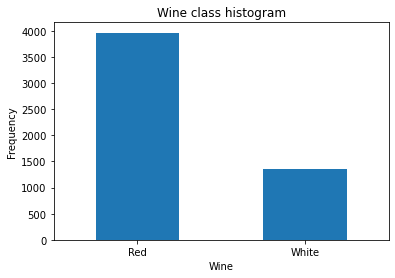

In [13]:
#Checking the frequency of Red and White wines

pd.value_counts(winedf['Type']).plot.bar()
plt.title('Wine class histogram')
plt.xlabel('Wine')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

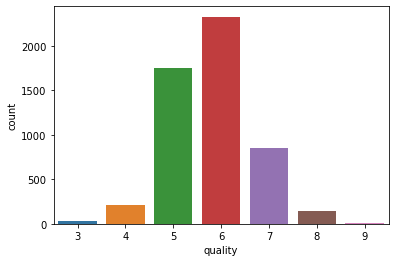

In [11]:
#Range of values in 'Quality'
#Plotting No.of values for each attribute
sns.countplot(x='quality', data=winedf)

- Range is 3-9
- More number of Wines are of quality 6 which is a Good type of quality

<AxesSubplot:xlabel='rating', ylabel='count'>

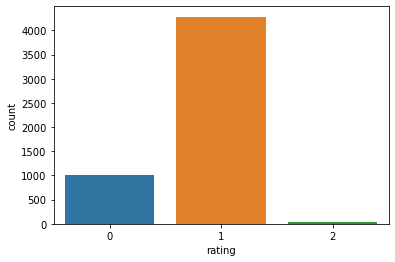

In [12]:
#Range of values in 'Rating'
#Plotting No.of values for each attribute
sns.countplot(x='rating', data=winedf)

<AxesSubplot:xlabel='rating', ylabel='count'>

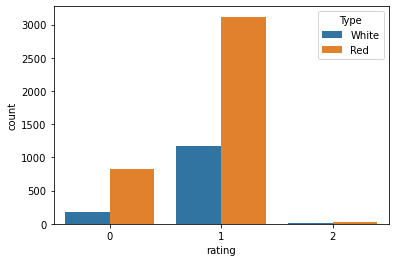

In [13]:
#Plotting rating for different types of wine 

sns.countplot(x="rating", hue="Type", data=winedf)

- More number of Outstanding wines are in Red wine
- More number of Good wines are in White wine
- Equal no.of wines are of bad wines in both types of wines

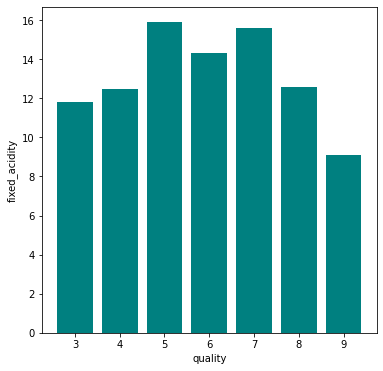

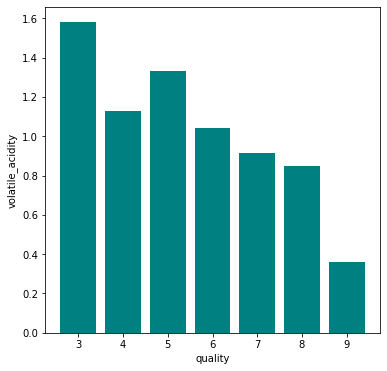

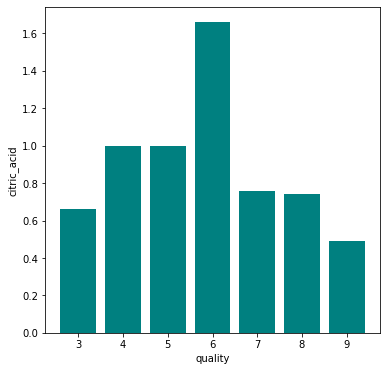

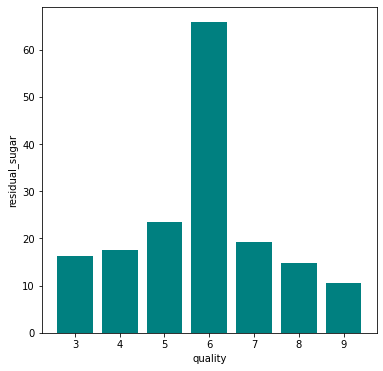

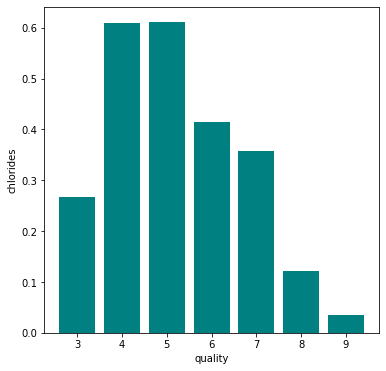

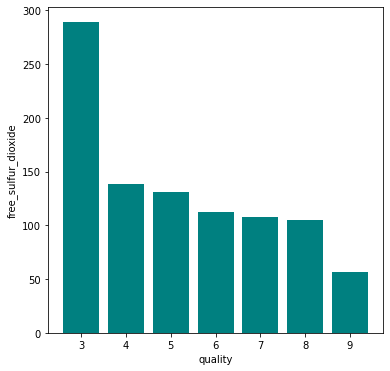

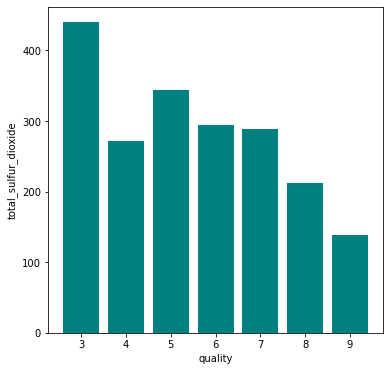

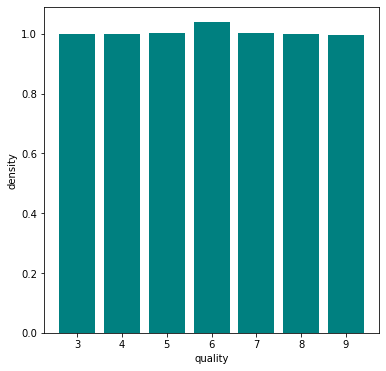

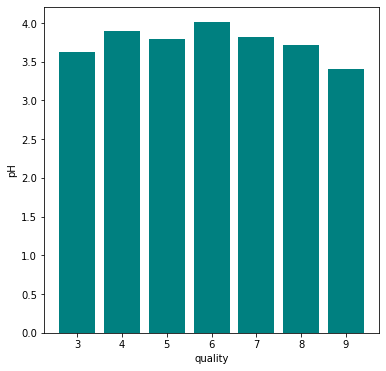

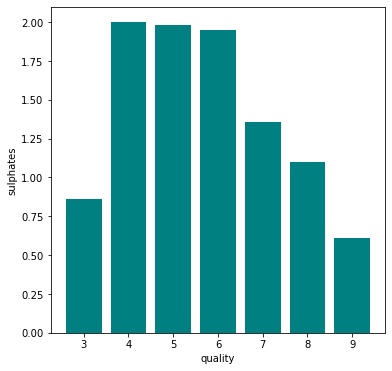

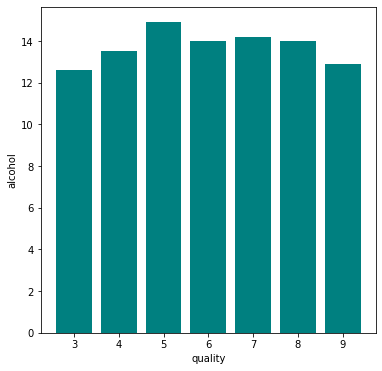

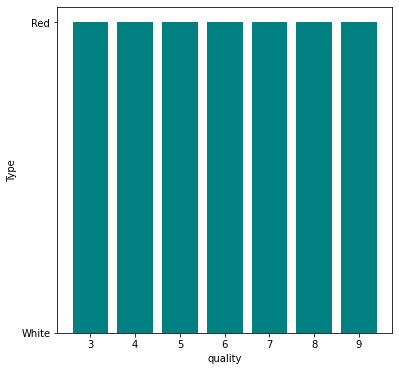

In [14]:
#Bar-graphs for each attribute against Quality to check what values can make changes in quality.

for i in winedf.columns[:-2]:
    plt.figure(figsize=[6,6])
    # plot bar graph
    plt.bar(winedf['quality'],winedf[i],color='teal')
    # label x-axis
    plt.xlabel('quality')
    #label y-axis
    plt.ylabel(i)

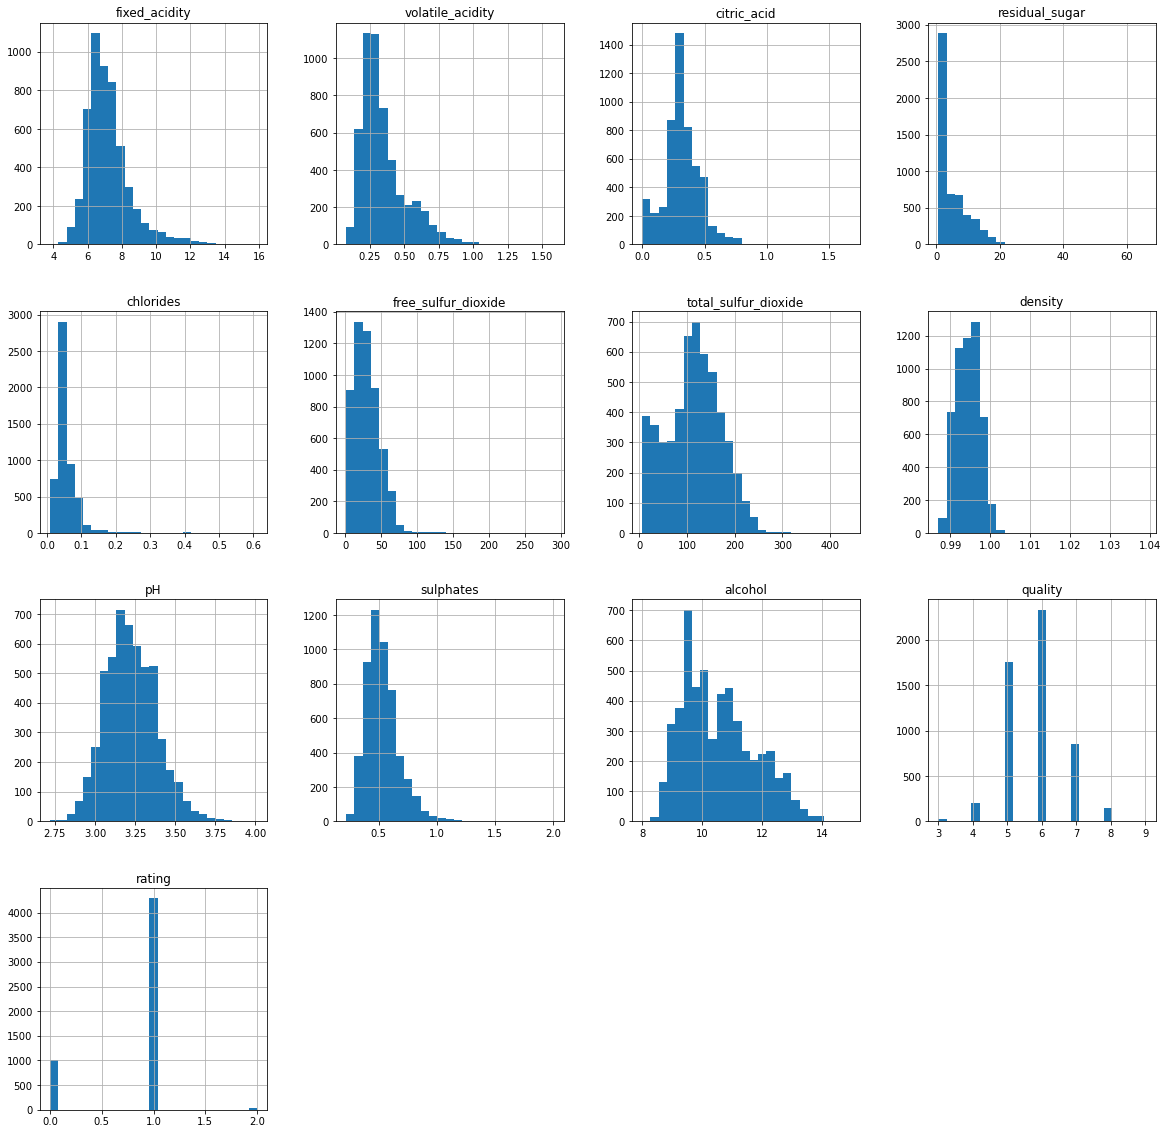

In [15]:
#Histogram
winedf.hist(bins=25,figsize=(20,20))
plt.show()

#Histogram shows how the data is distributed on features

- Most of the attributes are normally distributed but right skewed. 

### Heatmap, Scatter Plots and Inferences

<AxesSubplot:>

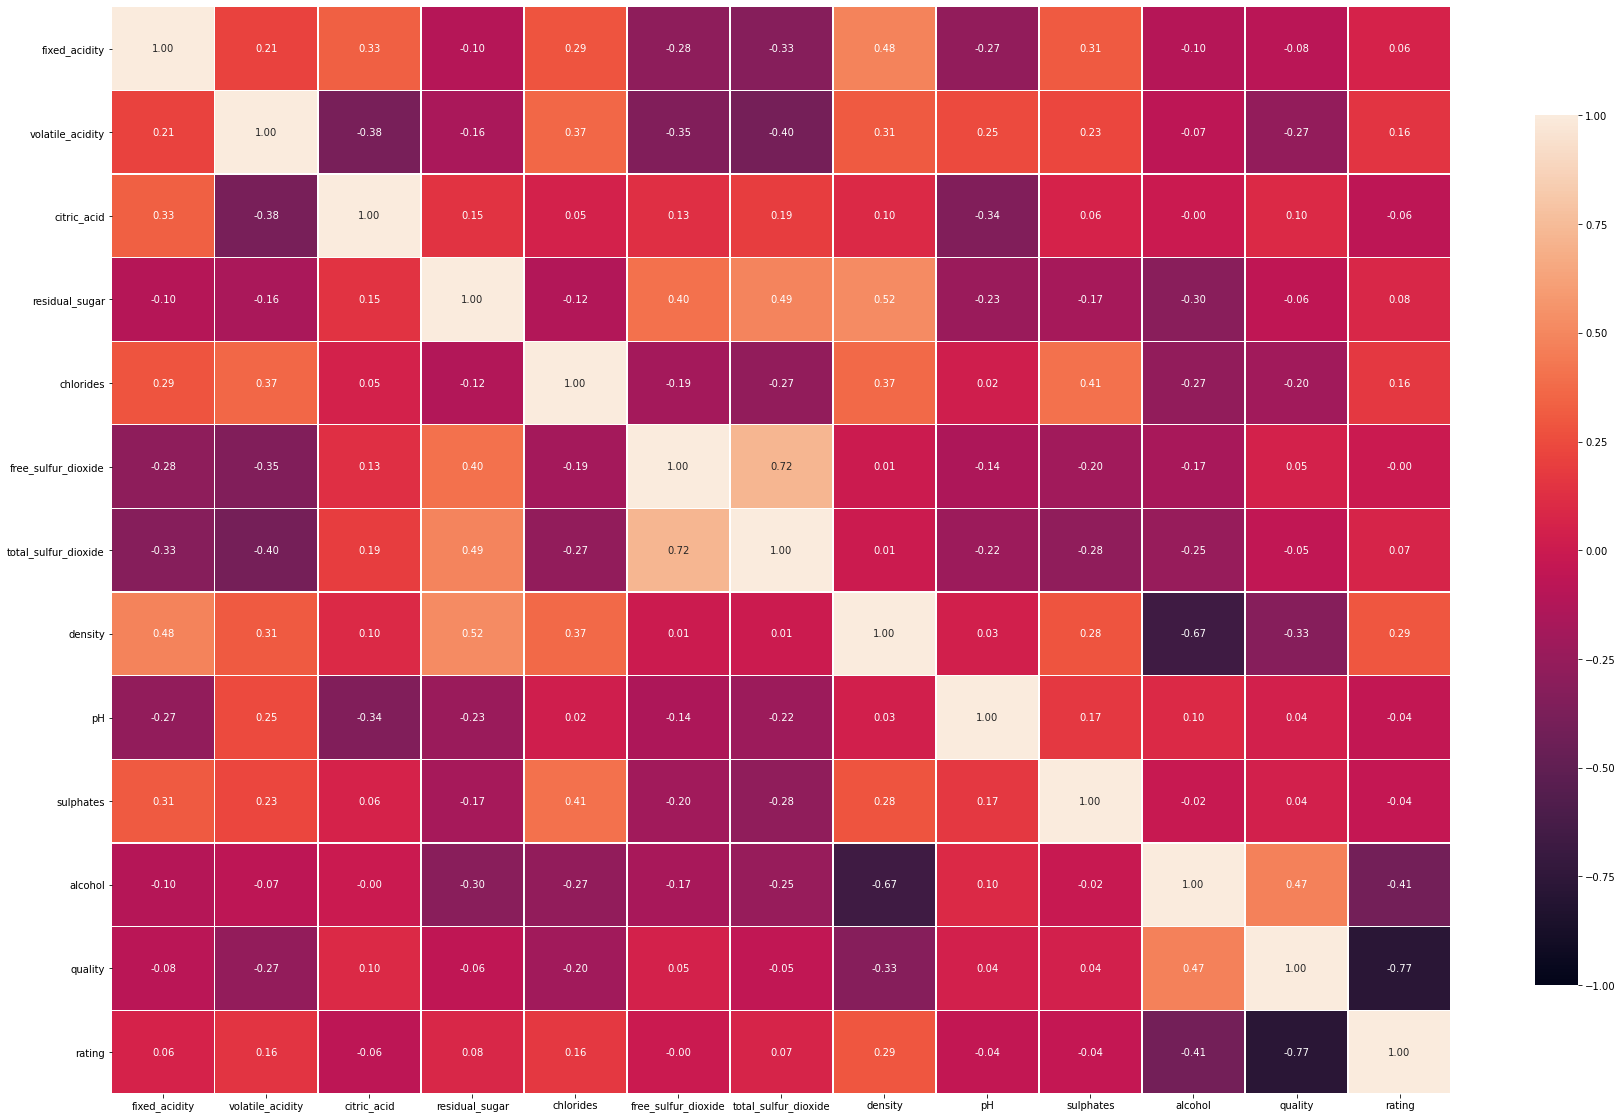

In [16]:
#Heatmap with Correlation Values

corr = winedf.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
sns.heatmap(corr, annot=True, fmt=".2f",linewidth=0.3,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

- Maximum Positive correlation is in between Total and Free Sulfur dioxide i.e., 0.72 (One column can be dropped)
- Maximum negative correlation is in between Alcohol-Density i.e., 0.67.

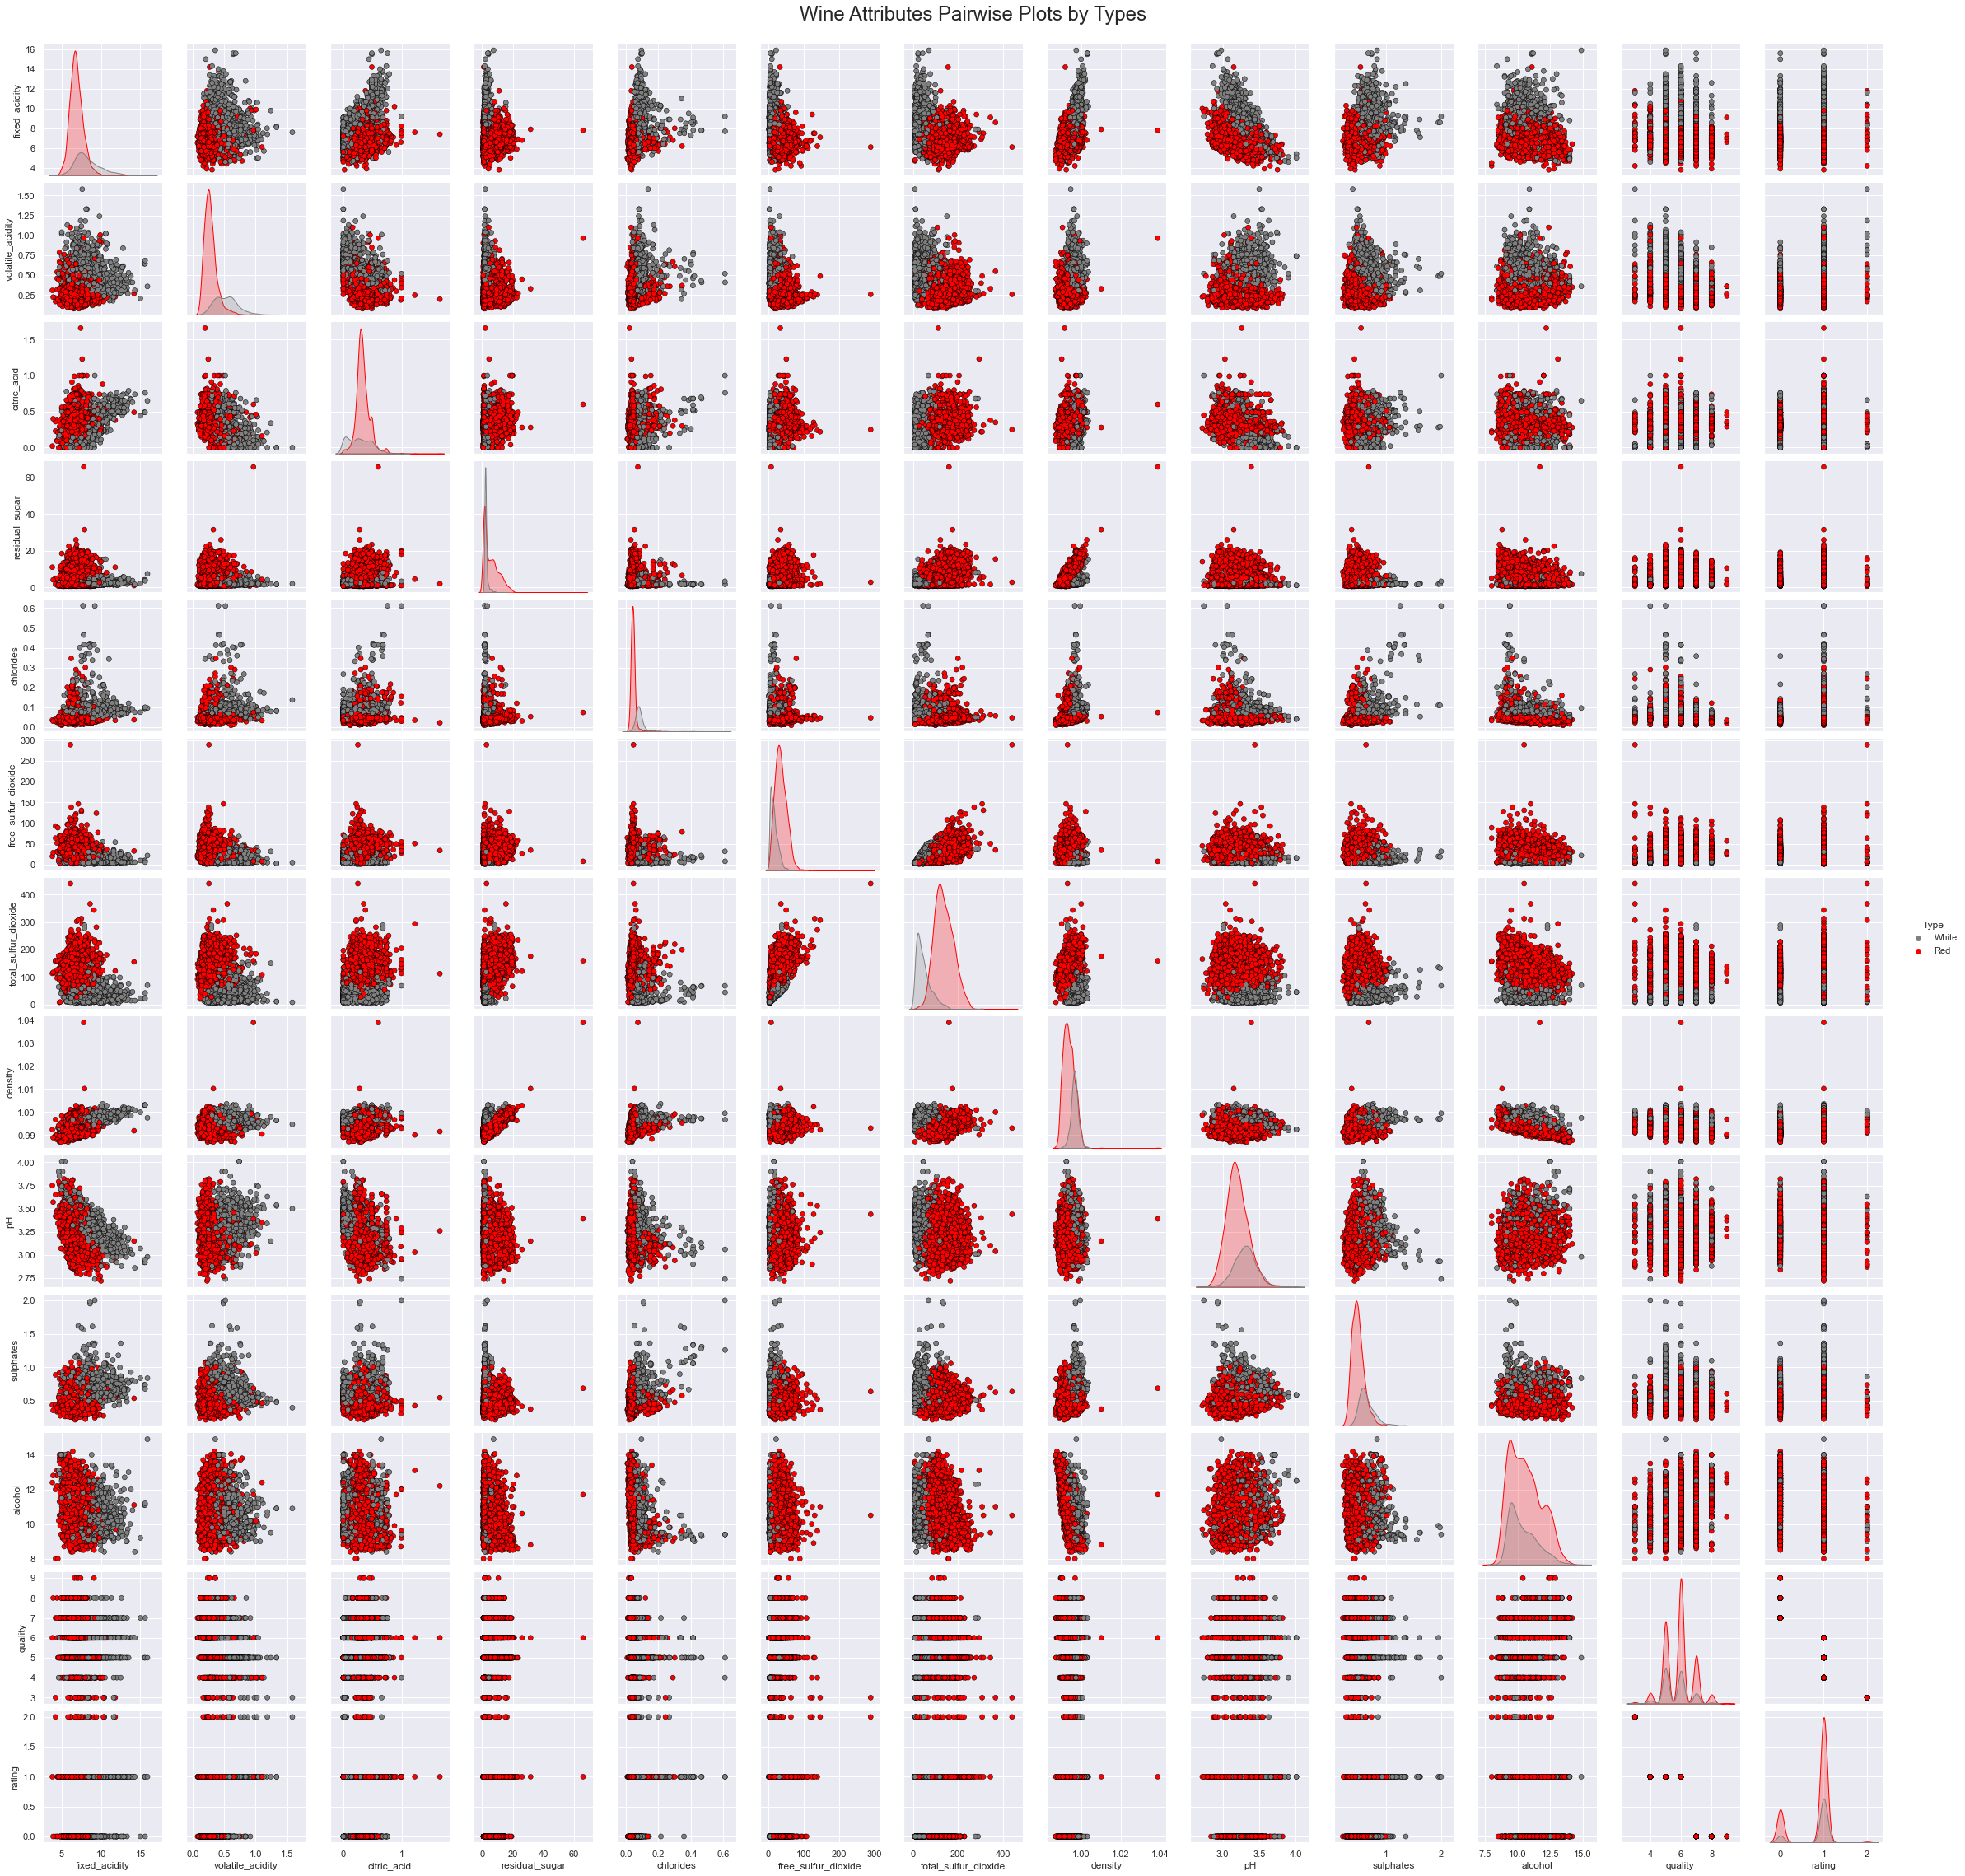

In [17]:
#Scatter plot for both Red and White wines 

sns.set(font_scale=1.0)
g = sns.pairplot(data = winedf, hue='Type', palette={'Red': 'Red', 'White': 'Grey'},plot_kws=dict(edgecolor='black', linewidth=0.5))
fig = g.fig 
fig.subplots_adjust(top=0.96, wspace=0.2)
t = fig.suptitle('Wine Attributes Pairwise Plots by Types', fontsize=24)


### From the above Correlation plot and Scatter plot
- We have inverse relationships between pH and fixed acidity and it is the same in case of citric acid and volatile acidity. 
- We have a strong positive relationship between free sulfur dioxide and total sulfur dioxide.
- Sugar content in the wine may represent the wine density in both the wines. 
- Low density contents are high on alcohol content. 

In [14]:
#Dropping Total Suplhuric acid as corr is greater than 0.7
winedf = winedf.drop(columns=['total_sulfur_dioxide'])
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        5324 non-null   float64
 1   volatile_acidity     5324 non-null   float64
 2   citric_acid          5324 non-null   float64
 3   residual_sugar       5324 non-null   float64
 4   chlorides            5324 non-null   float64
 5   free_sulfur_dioxide  5319 non-null   float64
 6   density              5321 non-null   float64
 7   pH                   5324 non-null   float64
 8   sulphates            5313 non-null   float64
 9   alcohol              5314 non-null   float64
 10  Type                 5324 non-null   object 
 11  quality              5324 non-null   int64  
 12  rating               5324 non-null   int32  
dtypes: float64(10), int32(1), int64(1), object(1)
memory usage: 561.5+ KB


## Detecting Missing Values

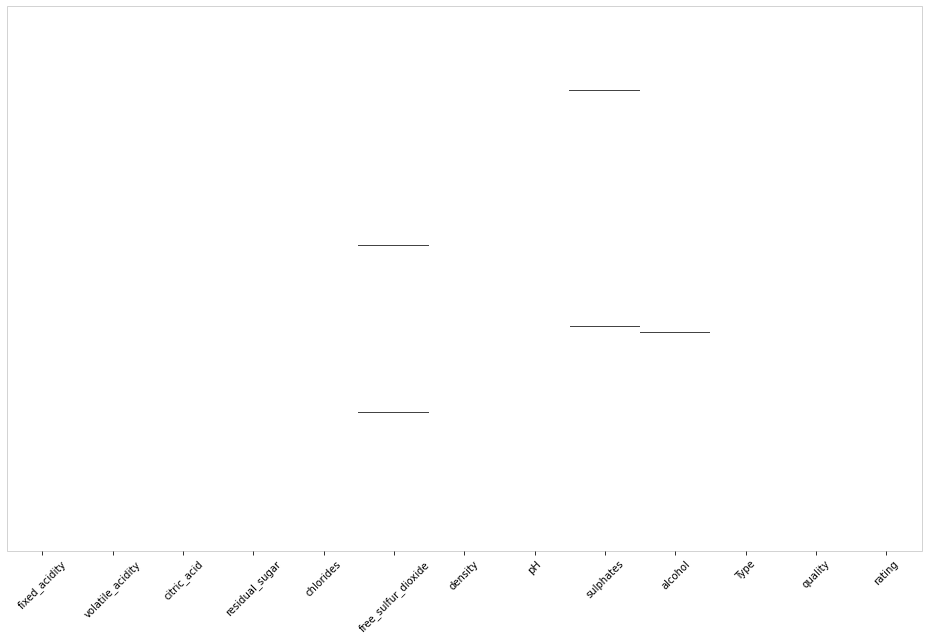

In [15]:
#Checking if there are any missing values with the help of heatmap.

naInfo = np.zeros(winedf.shape)
naInfo[winedf.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=winedf.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Calculating No.of Missing Values

print(winedf.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     5
density                 3
pH                      0
sulphates              11
alcohol                10
Type                    0
quality                 0
rating                  0
dtype: int64


#### We have :
- 5 missed values in 'free sulfur dioxide' attribute
- 3 missed values in 'density' attribute
- 11 missed values in 'sulphates' attribute
- 10 missed values in 'alcohol' attribute

# Data preparation

## Imputing Missing Values

In [17]:
#Replacing the missing values with mean values.

class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

winedf = DataFrameImputer().fit_transform(winedf)

In [18]:
#Checking if the values are imputed
winedf.info()

#Checking if there are any null values
winedf.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        5324 non-null   float64
 1   volatile_acidity     5324 non-null   float64
 2   citric_acid          5324 non-null   float64
 3   residual_sugar       5324 non-null   float64
 4   chlorides            5324 non-null   float64
 5   free_sulfur_dioxide  5324 non-null   float64
 6   density              5324 non-null   float64
 7   pH                   5324 non-null   float64
 8   sulphates            5324 non-null   float64
 9   alcohol              5324 non-null   float64
 10  Type                 5324 non-null   object 
 11  quality              5324 non-null   int64  
 12  rating               5324 non-null   int32  
dtypes: float64(10), int32(1), int64(1), object(1)
memory usage: 561.5+ KB


False

- Null values are imputed

## Detecting Outliers and Imputing

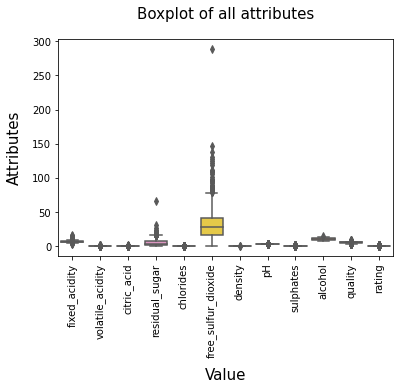

In [19]:
#Box Plot to detect outliers
import seaborn as sns
ax = sns.boxplot(data = winedf, orient = "v", palette = "Set2", color='red')
#add labels
ax.set_xlabel("Value", fontsize = 15, labelpad = 10)
ax.set_ylabel("Attributes", fontsize = 15, labelpad = 10)
ax.set_title("Boxplot of all attributes", fontsize = 15,
            pad = 20)
plt.xticks(rotation=90)
#edit ticks
ax.tick_params(which = "both", labelsize = 10)

In [20]:
#Checking outlier values for Residual_Sugar and Free_Sulphur_Dioxide

cols=['residual_sugar','free_sulfur_dioxide']
for x in cols:
    print(winedf.groupby([x]).size())

residual_sugar
0.600030      1
0.700035      7
0.800040     25
0.900045     36
0.950048      3
             ..
22.601130     1
23.501175     1
26.051303     1
31.601580     1
65.803290     1
Length: 316, dtype: int64
free_sulfur_dioxide
1.000050        2
2.000100        2
3.000150       50
4.000200       43
5.000250      111
             ... 
128.006400      1
131.006550      1
138.506925      1
146.507325      1
289.014450      1
Length: 134, dtype: int64


In [21]:
#Imputing outlier values will null values

def UpperLowerBounds(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    upper =  (Q3+1.5*IQR)
    lower = (Q1-1.5*IQR)
    return (upper,lower)

''' Removing the Outliers '''
#residual sugar
tupleKM = UpperLowerBounds(winedf['residual_sugar'])
winedf['residual_sugar'] = np.where((winedf['residual_sugar'] > tupleKM[0]) | (winedf['residual_sugar'] < tupleKM[1]) , np.nan, winedf['residual_sugar'])

#free_sulfur_dioxide
tupleMY = UpperLowerBounds(winedf['free_sulfur_dioxide'])
winedf['free_sulfur_dioxide'] = np.where((winedf['free_sulfur_dioxide'] > tupleMY[0]) | (winedf['free_sulfur_dioxide'] < tupleMY[1]) , np.nan, winedf['free_sulfur_dioxide'])


In [65]:
#Imputing Missing Values for residual_sugar/ free_sulfur_dioxide
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
winedf[['residual_sugar','free_sulfur_dioxide']]=imputer.fit_transform(winedf[['residual_sugar','free_sulfur_dioxide']])
print(winedf.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5324 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        5324 non-null   float64
 1   volatile_acidity     5324 non-null   float64
 2   citric_acid          5324 non-null   float64
 3   residual_sugar       5324 non-null   float64
 4   chlorides            5324 non-null   float64
 5   free_sulfur_dioxide  5324 non-null   float64
 6   density              5324 non-null   float64
 7   pH                   5324 non-null   float64
 8   sulphates            5324 non-null   float64
 9   alcohol              5324 non-null   float64
 10  quality              5324 non-null   int64  
 11  rating               5324 non-null   int32  
 12  Type_New             5324 non-null   int64  
dtypes: float64(10), int32(1), int64(2)
memory usage: 561.5 KB
None


In [67]:
# Creating dummy variables for 'Object' type attributes

winedf['Type_New']=[1 if p == 'Red' else 0 for p in winedf.Type_New] 
winedf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating,Type_New
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,0.99746,3.580179,0.669933,10.20102,5,1,0
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,1.00030,3.160158,0.489951,9.50095,5,1,0
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,0.99550,3.240162,0.429957,9.20092,6,1,0
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,0.99850,3.140157,0.489951,9.10091,7,0,0
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,0.99800,3.180159,0.489951,8.70087,5,1,0


## PCA (Principal Component Analysis)

- PCA is used to explore large datasets
- Features that are highly correlated, reduce to fewer features without losing too much information.
- Final dataset contains most of the information with smaller number of numerical variables

In [31]:
#sklearn.preprocessing.MinMaxScaler

def scaler(df,scaler,cols):
    df = pd.DataFrame(scaler.fit_transform(df),columns=cols) #scaled object
    return df  

scaled_df=scaler(df=winedf.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),cols=winedf.columns[1:])
scaled_df.head(10)

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating,Type_New
0,0.590000,0.000000,0.103896,0.131229,0.194805,0.201465,0.666666,0.252809,0.318841,0.333333,0.5,0.0
1,0.206667,0.379518,0.110390,0.136211,0.064935,0.256223,0.341085,0.151685,0.217391,0.333333,0.5,0.0
2,0.126667,0.295181,0.435065,0.061462,0.675325,0.163675,0.403101,0.117978,0.173913,0.500000,0.5,1.0
3,0.073333,0.180723,0.792208,0.073088,0.616883,0.221517,0.325581,0.151685,0.159420,0.666667,0.0,1.0
4,0.173333,0.180723,0.681818,0.063123,0.350649,0.211877,0.356589,0.151685,0.101449,0.333333,0.5,1.0
5,0.353333,0.072289,0.045455,0.000000,0.831169,0.005591,0.418604,0.084270,0.797101,0.333333,0.5,1.0
6,0.220000,0.174699,0.077922,0.038205,0.324675,0.034320,0.186046,0.073034,0.724638,0.833333,0.0,1.0
7,0.100000,0.108434,0.512987,0.058139,0.753247,0.163289,0.341085,0.151685,0.217391,0.333333,0.5,1.0
8,0.186667,0.096386,0.370130,0.044849,0.454545,0.136701,0.348837,0.224719,0.260870,0.333333,0.5,1.0
9,0.086667,0.174699,0.308442,0.033223,0.545455,0.077316,0.162791,0.117978,0.507246,0.666667,0.0,1.0


In [32]:
#sklearn.preprocessing.MinMaxScaler

def scale_sum(df,scaler,index):
    df = pd.DataFrame(scaler.fit_transform(df)) #scaled object
    pcs = PCA()  #pca technique
    pcs.fit(df) #fit data to pca
    pcsSummary_df = pd.DataFrame({'Explained Variance': np.sqrt(pcs.explained_variance_),
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)})
    pcsSummary_df = pcsSummary_df.transpose()
    pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
    pcsSummary_df.round(4)
    
    pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary_df.columns, index=index)
    
    scores=pd.DataFrame(pcs.fit_transform(df),columns=pcsSummary_df.columns)
    
    return pcsSummary_df, pcsComponents_df, scores  # return #1 summary of PCA, #2 components, #scores

pcsSummary_df=scale_sum(df=winedf.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=winedf.columns[1:])[0]
pcsSummary_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Explained Variance,0.474694,0.276431,0.226402,0.165231,0.134511,0.121509,0.095205,0.076420,0.070878,0.063613,0.046572,0.024535
Explained Variance Ratio,0.512227,0.173704,0.116519,0.062061,0.041130,0.033562,0.020604,0.013276,0.011420,0.009199,0.004930,0.001368
Cumulative Proportion,0.512227,0.685931,0.802450,0.864511,0.905640,0.939203,0.959807,0.973083,0.984502,0.993701,0.998632,1.000000


Text(0.5, 1.0, 'Explained Variance by Component')

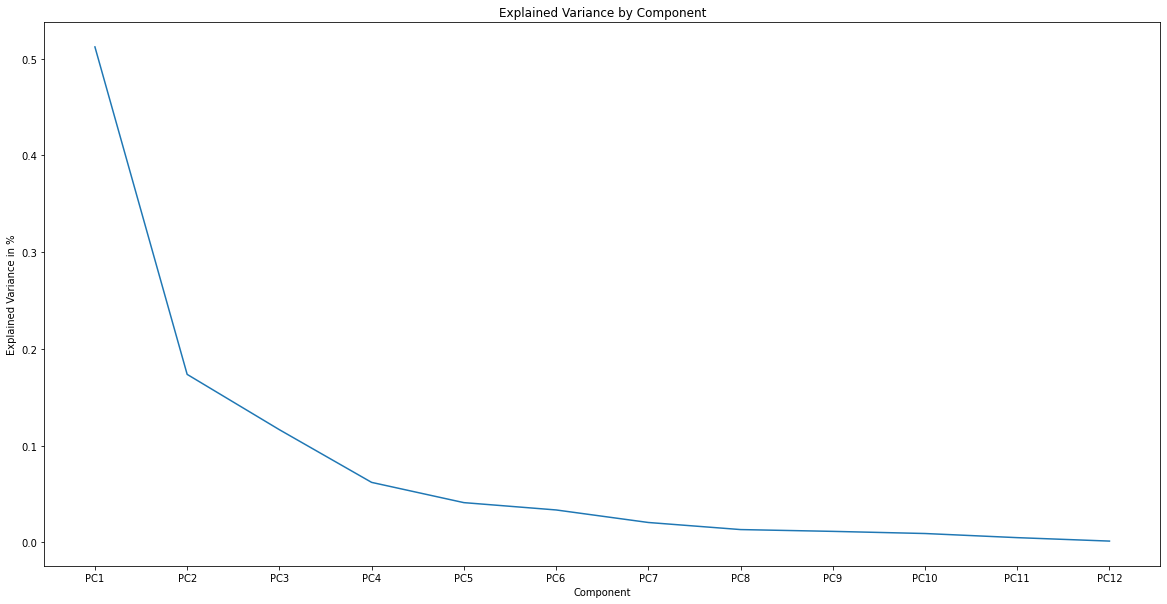

In [33]:
#Scree Plot
plt.figure(figsize=(20,10))
plt.plot(pcsSummary_df[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance in %')
plt.title('Explained Variance by Component')

- According to Elbow rule, Infection point is at 4th component

In [34]:
pcsComponents_df=scale_sum(df=winedf.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=winedf.columns[1:])[1]
pcsComponents_df

#how much does each feature contribute to each component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
volatile_acidity,0.156171,0.072370,-0.004004,0.050165,0.136109,-0.175580,0.622798,0.207765,0.374954,0.563648,-0.163631,-0.048769
citric_acid,-0.040624,0.001762,-0.036174,-0.002703,-0.155647,0.404488,-0.445897,0.433501,-0.200034,0.591340,-0.132975,-0.122750
residual_sugar,-0.250725,0.561145,-0.598636,0.462314,0.183396,-0.029967,-0.045846,0.006137,-0.014997,-0.042687,0.032254,-0.101957
chlorides,0.063243,0.052229,-0.001199,-0.031946,-0.094059,0.062145,-0.016361,0.170105,0.231527,0.099108,0.940622,0.046272
free_sulfur_dioxide,-0.272357,0.215724,-0.281731,-0.848891,0.232393,0.116242,0.100533,0.033783,-0.015750,-0.012920,-0.006826,0.008254
density,0.039957,0.149823,-0.069192,0.014128,-0.116301,-0.031242,-0.073412,0.059746,0.032456,0.079389,-0.096079,0.964843
pH,0.089976,-0.058579,-0.014371,-0.112426,0.297793,-0.798992,-0.429882,0.168764,-0.090320,0.154954,0.045431,-0.032337
sulphates,0.086360,-0.001228,-0.055298,-0.041426,-0.056414,0.065677,-0.287107,0.389749,0.738079,-0.377277,-0.230945,-0.074180
alcohol,-0.003651,-0.454826,-0.085226,0.177977,0.775285,0.309041,0.012567,0.138899,-0.026196,-0.061103,0.068139,0.170568
quality,-0.043045,-0.347634,-0.384314,-0.034923,-0.088681,0.021517,-0.247070,-0.634483,0.375212,0.339996,-0.007399,-0.002121


<AxesSubplot:>

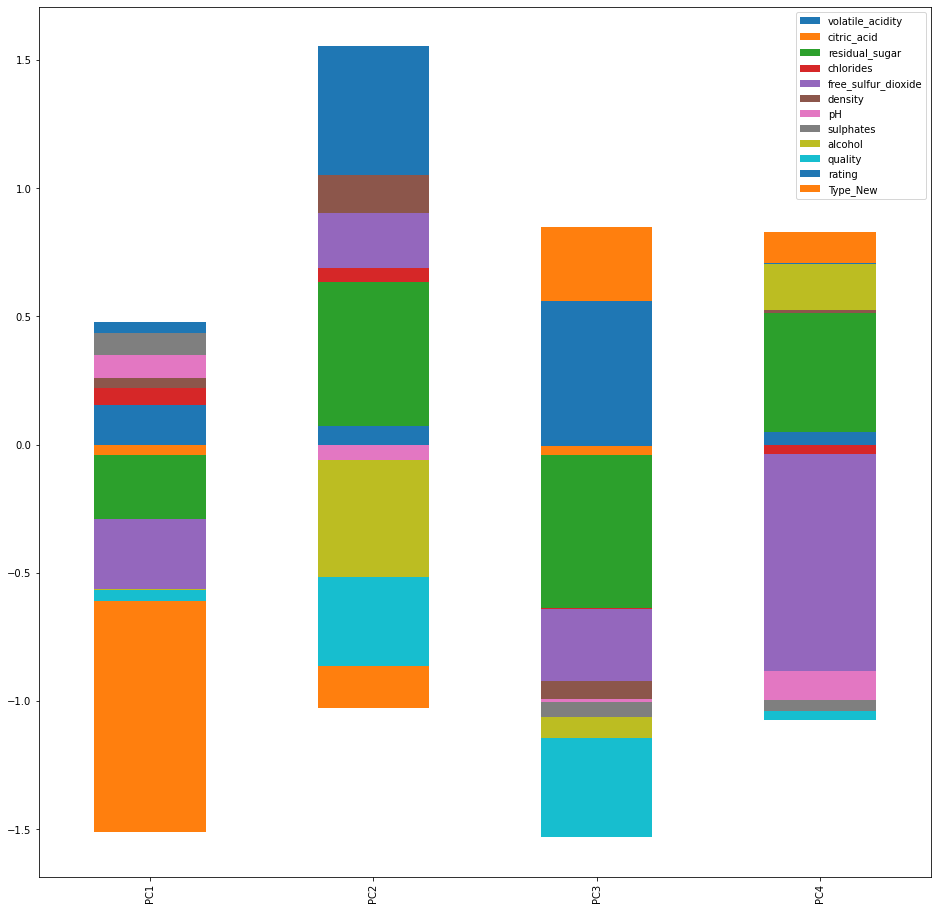

In [35]:
pcsComponents_df[['PC1','PC2','PC3','PC4',]].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

### Analysing the features represented by each component

#### For Component 1
- Type_New
- Free Sulphur Diaoxide
- Residual Sugar

#### For Component 2
- Volatile acidity
- Residual Sugar
- Alcohol

#### For Component 3
- Volatile acidity
- Residual Sugar
- Quality

#### For Component 4
- Free Sulphur Dioxide
- Residual Sugar

In [36]:
scores=scale_sum(df=winedf.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=winedf.columns[1:])[2]
scores.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.878996,0.131833,0.033554,-0.034612,0.133040,-0.277994,0.169709,0.064470,0.100815,0.074585,-0.022539,0.010673
1,0.802302,0.154191,0.069184,0.081731,-0.183936,0.148274,-0.087992,0.040670,-0.156529,0.083086,-0.008109,0.034837
2,-0.368408,0.239437,-0.059510,-0.187142,-0.050316,-0.014528,-0.068843,-0.035740,-0.016927,0.100994,-0.018113,-0.021273
3,-0.474477,0.135406,-0.600907,0.023037,-0.235662,-0.090264,0.032775,-0.021409,-0.026407,-0.050516,0.015737,0.015528
4,-0.321714,0.411926,-0.046105,0.202584,-0.119262,-0.102161,0.014322,0.019017,-0.004728,-0.014896,-0.017025,-0.003756
5,-0.275535,-0.182825,0.160568,-0.371469,0.508606,0.060831,0.269874,0.079490,-0.008463,0.013300,-0.029632,-0.010678
6,-0.230924,-0.654457,-0.184230,0.060430,-0.002304,0.157250,0.192978,-0.106364,0.033234,0.074719,0.005773,0.003699
7,-0.401625,0.339238,-0.061843,-0.198863,0.035997,-0.017240,0.060869,-0.005255,-0.025941,-0.110810,0.003570,0.002398
8,-0.265486,0.175891,0.101919,-0.003073,-0.009709,-0.055727,0.075152,0.028523,0.063937,-0.091565,-0.035076,-0.012770
9,-0.358515,-0.322821,-0.306434,-0.058455,-0.094621,0.148527,0.154030,-0.034327,-0.045020,-0.074149,-0.000314,-0.009533


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

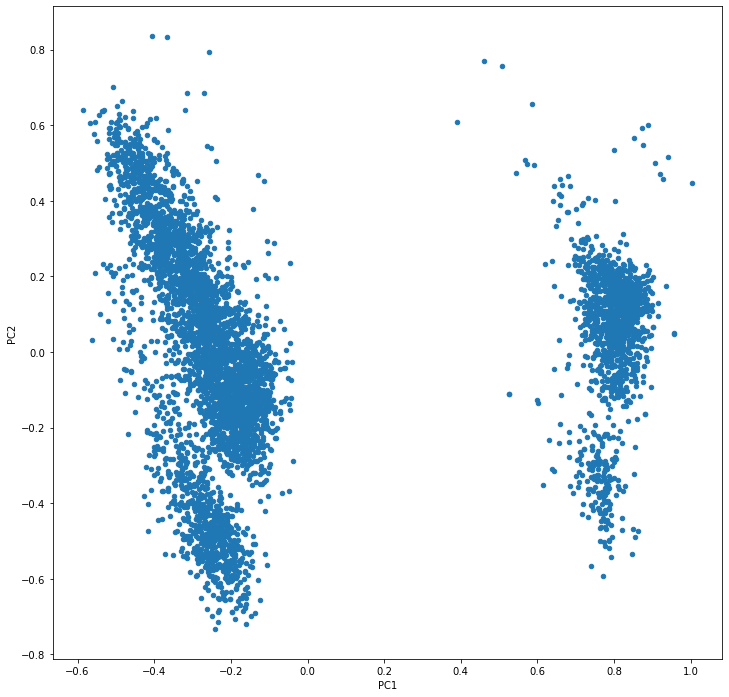

In [37]:
#Plotting first 2 components

scores.plot.scatter(x='PC1', y='PC2',figsize=(12, 12))

In [63]:
cols=['PC1', 'PC2', 'PC3'] #list # of components I want to use

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):  #2=2 clusters, use enough to where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[cols])
    silhouette.append(silhouette_score(scores[cols],kmeans.labels_)) #silhoustte
    inertia.append(kmeans.inertia_)
    clusters.append(i)

In [ ]:
kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put dilhouette and inertia in df
kmeans_eval  #index # clusters, silhouette_score is the score for that many clusters


### Silhouette Score

- A method that calculates the average distance of each point from all other points in a cluster, and then compares that value with the average distance to every point in every other cluster.
- ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

In [ ]:
kmeans_eval['inertia'].plot(figsize=(12, 12))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Text(0.5, 1.0, 'Silhouette score by # of clusters')

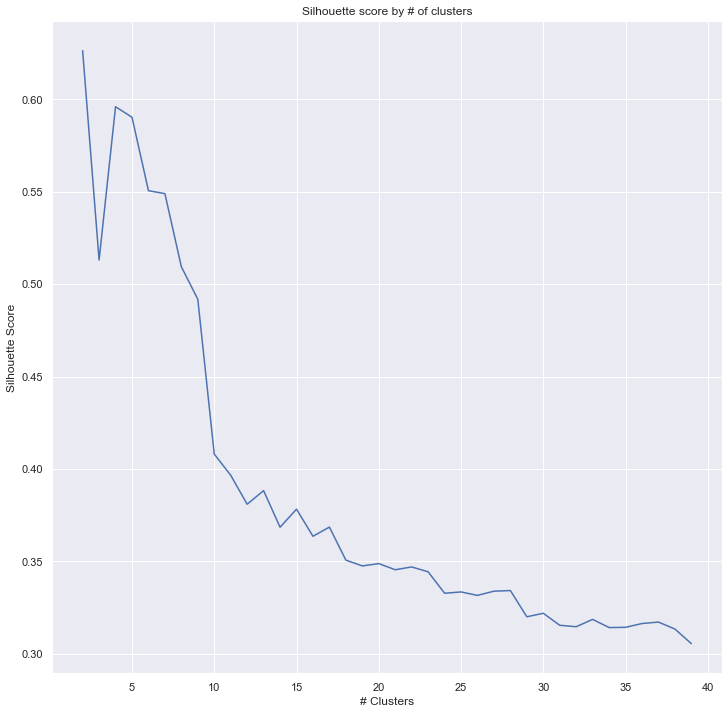

In [38]:
kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score, visually look for highest value and corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')
#print(kmeans_eval['silhouette_score'])

In [ ]:
kmeans= KMeans(n_clusters=5).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans
scores['quality']=winedf['quality']


groups = scores.groupby('cluster') #grouping subplots
winedf['cluster']=scores['cluster']  #add the cluster to primary df
ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


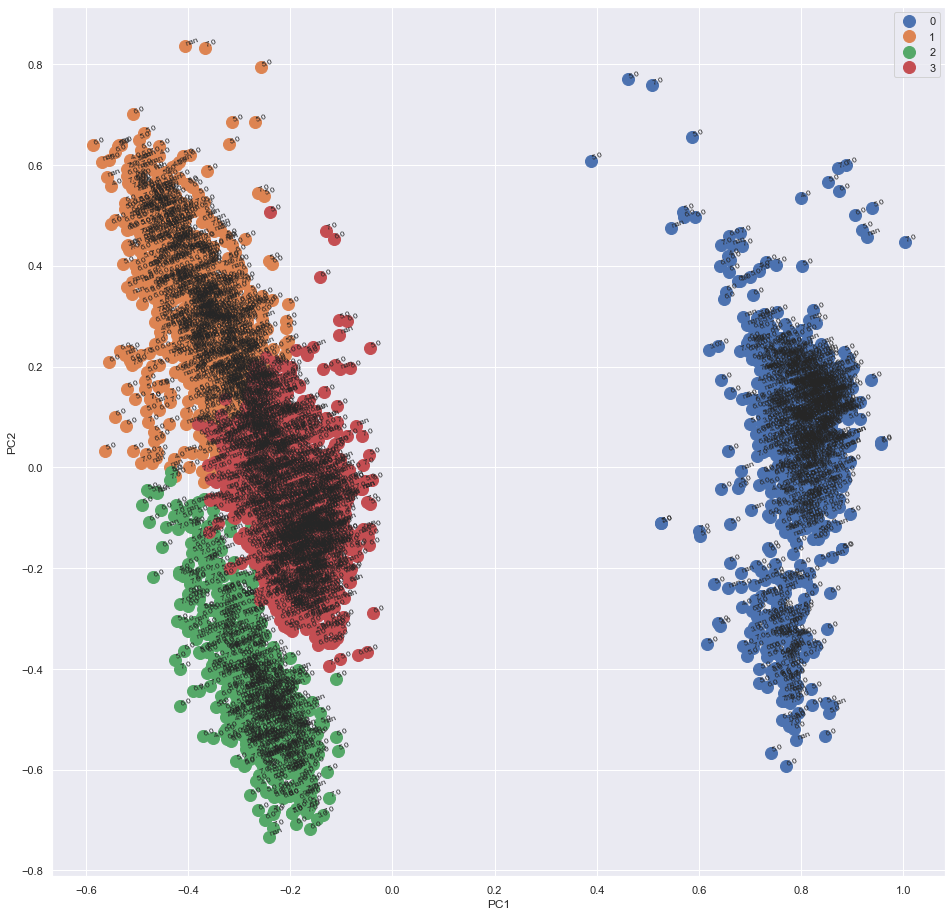

In [40]:
kmeans= KMeans(n_clusters=4).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans


groups = scores.groupby('cluster') #grouping subplots

winedf['cluster']=scores['cluster']  #add the cluster to primary df

ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scores[['PC1','PC2','quality']]

_ = points.apply(lambda x:   ax.text(*x, rotation=20, horizontalalignment='left',
                                     verticalalignment='bottom', fontsize=8), axis=1)


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots



### K-Means Clustering

- Group similar data points together and discover underlying patterns.
- K-means allocates every data point to the nearest cluster
- The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [48]:

rating = winedf["rating"]

In [49]:
# DATA PREPARATION: Prepare target variable and independent variable
X =  np.array(winedf.iloc[:,winedf.columns != 'Type'])
y = rating
print("Shape of X(PREDICTORS): {}".format(X.shape))
print("Shape of y(TARGET): {}".format(y.shape))

Shape of X(PREDICTORS): (5324, 13)
Shape of y(TARGET): (5324,)


# DATA PREPARATION

In [50]:
# DATA PREPARATION: Create training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=32, shuffle=True)


print("Number of X_train dataset: ", X_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("\nNumber of X_test dataset: ", X_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (3726, 13)
Number of y_train dataset:  (3726,)

Number of X_test dataset:  (1598, 13)
Number of y_test dataset:  (1598,)


# MODEL - PIPELINE CREATION

In [53]:
# MODEL - PIPELINE: Libraries needed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV


In [54]:
# 4. MODEL - PIPELINE CREATION- Create pipelines with or without PCA

##  First create three different pipelines without PCA
# Linear Regression
pipeline_linearreg = Pipeline([('scalar1', MinMaxScaler()),
                           ('lr_model', LinearRegression())])
# Ridge Regression
pipeline_Ridgereg = Pipeline([('scalar1', StandardScaler()),
                           ('ridge_reg_model', Ridge(normalize=True,alpha=1))])
# Lasso Regression
pipeline_LassoReg = Pipeline([('scalar1', StandardScaler()),
                           ('Lasso_reg_model', Lasso(normalize=False,alpha=1))])

## Now create pipelines with PCA

# Pipeline for logistic regression
pipeline_pca_linearreg = Pipeline([('scalar1', MinMaxScaler()),
                       ('pca1', PCA(n_components=2)),
                       ('lr_model', LinearRegression())])

# Pipeline for Ridge regression
pipeline_pca_Ridgereg = Pipeline([('scalar1', StandardScaler()),
                           ('ridge_reg_model', Ridge(normalize=True,alpha=1))])
# Pipeline for Lasso regression
pipeline_pca_LassoReg = Pipeline([('scalar1', StandardScaler()),
                           ('Lasso_reg_model', Lasso(normalize=False,alpha=1))])

# Create the list of pipelines for Regression
pipelines = [pipeline_linearreg, pipeline_Ridgereg,pipeline_LassoReg,pipeline_pca_linearreg,pipeline_pca_Ridgereg,pipeline_pca_LassoReg]
pipelines

[Pipeline(steps=[('scalar1', MinMaxScaler()), ('lr_model', LinearRegression())]),
 Pipeline(steps=[('scalar1', StandardScaler()),
                 ('ridge_reg_model', Ridge(alpha=1, normalize=True))]),
 Pipeline(steps=[('scalar1', StandardScaler()),
                 ('Lasso_reg_model', Lasso(alpha=1))]),
 Pipeline(steps=[('scalar1', MinMaxScaler()), ('pca1', PCA(n_components=2)),
                 ('lr_model', LinearRegression())]),
 Pipeline(steps=[('scalar1', StandardScaler()),
                 ('ridge_reg_model', Ridge(alpha=1, normalize=True))]),
 Pipeline(steps=[('scalar1', StandardScaler()),
                 ('Lasso_reg_model', Lasso(alpha=1))])]

In [55]:
# 4. MODEL - PIPELINE CREATION: Fit the pipelines in training dataset
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    #predicted_values = pipe.predict(X_test)

In [58]:
# 5. MODEL EVALUATION: Dictionary of pipelines and regression type for ease of reference
pipe_dict = {0: 'Linear Regression',1:'Ridge Regression',2:'Lasso Regression',3: 'Linear Regression with PCA',
             4:'Ridge Regression with PCA',5:'Lasso Regression with PCA'}

# Model evaluation in training dataset
for i, model in enumerate(pipelines):
    print("{} MAE: {}".format(pipe_dict[i], mean_absolute_error(y_train, model.predict(X_train))),)
    print("{} MSE: {}".format(pipe_dict[i],  mean_squared_error(y_train,  model.predict(X_train))))
    print("{} RMSE: {}".format(pipe_dict[i], np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print("{} R squared: {}".format(pipe_dict[i],  model.score(X_train,y_train)))
    print("\n")

Linear Regression MAE: 5.259703491895763e-16
Linear Regression MSE: 4.297552047675707e-31
Linear Regression RMSE: 6.55557171242578e-16
Linear Regression R squared: 1.0


Ridge Regression MAE: 0.13456841850073692
Ridge Regression MSE: 0.031126295445949435
Ridge Regression RMSE: 0.17642645903024137
Ridge Regression R squared: 0.8099437014777006


Lasso Regression MAE: 0.3122800739547922
Lasso Regression MSE: 0.1637740800381702
Lasso Regression RMSE: 0.4046901037067378
Lasso Regression R squared: 0.0


Linear Regression with PCA MAE: 0.2543405661950434
Linear Regression with PCA MSE: 0.10847972525121836
Linear Regression with PCA RMSE: 0.3293626045124406
Linear Regression with PCA R squared: 0.3376257999682525


Ridge Regression with PCA MAE: 0.13456841850073692
Ridge Regression with PCA MSE: 0.031126295445949435
Ridge Regression with PCA RMSE: 0.17642645903024137
Ridge Regression with PCA R squared: 0.8099437014777006


Lasso Regression with PCA MAE: 0.3122800739547922
Lasso Regression w

In [61]:
# 5. MODEL EVALUATION : Model evaluation in Training dataset
for i, model in enumerate(pipelines):
    print("{} Training Accuracy: {}".format(pipe_dict[i], model.score(X_train, y_train).round(4)))

Linear Regression Training Accuracy: 1.0
Ridge Regression Training Accuracy: 0.8099
Lasso Regression Training Accuracy: 0.0
Linear Regression with PCA Training Accuracy: 0.3376
Ridge Regression with PCA Training Accuracy: 0.8099
Lasso Regression with PCA Training Accuracy: 0.0


In [60]:
# 6. MODEL EVALUATION : Model evaluation in testing dataset
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test).round(4)))

Linear Regression Test Accuracy: 1.0
Ridge Regression Test Accuracy: 0.8077
Lasso Regression Test Accuracy: -0.0001
Linear Regression with PCA Test Accuracy: 0.3199
Ridge Regression with PCA Test Accuracy: 0.8077
Lasso Regression with PCA Test Accuracy: -0.0001


In [49]:
# Initializer
best_accuracy = 0.0
best_regression_model = 0
best_pipeline = ""

for i, model in enumerate(pipelines):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_regression_model = i
print("Regression Model with best accuracy in test dataset: {}".format(pipe_dict[best_regression_model]))

Regression Model with best accuracy in test dataset: Linear Regression


# Classification

In [50]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
# Load the dataframe
raw_data = pd.read_csv('wine.csv')

In [52]:
# DATA PREPROCESSING: Remove the duplicated rows
without_duplicate = raw_data.drop_duplicates(keep='first').copy()
without_duplicate.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,quality
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,31.99840,0.997460,3.580179,0.669933,10.20102,White,5
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,17.99910,1.000300,3.160158,0.489951,9.50095,White,5
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,205.98970,0.995500,3.240162,0.429957,9.20092,Red,6
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,228.98855,0.998500,3.140157,0.489951,9.10091,Red,7
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,236.98815,0.998000,3.180159,0.489951,8.70087,Red,5
5,4.99950,0.609939,0.120006,1.300065,0.009000,65.003250,99.99500,0.987301,3.260163,0.369963,13.50135,Red,5
6,7.29927,0.409959,0.290015,1.800090,0.031998,26.001300,73.99630,0.988791,2.960148,0.349965,13.00130,Red,8
7,6.59934,0.229977,0.180009,8.500425,0.043998,59.002950,187.99060,0.995480,3.160158,0.489951,9.50095,Red,5
8,5.99940,0.359964,0.160008,6.300315,0.035998,36.001800,190.99045,0.994101,3.170159,0.619938,9.80098,Red,5
9,6.59934,0.209979,0.290015,5.350268,0.028999,43.002150,105.99470,0.991021,2.930147,0.429957,11.50115,Red,7


In [53]:
# DATA PREPROCESSING: Remove all NAs
# Drop the whole row that contains the empty cell
# Always assign the new dataframe
without_dup_na = without_duplicate.dropna(how= "any").copy()

## 3. DATA PREPARATION

In [54]:
# DATA PREPARATION: Prepare target variable and independent variable
X = np.array(without_dup_na.iloc[:,without_dup_na.columns != 'Type'])
y = np.array(without_dup_na.iloc[:,without_dup_na.columns == 'Type'])

print("Shape of X(PREDICTORS): {}".format(X.shape))
print("Shape of y(TARGET): {}".format(y.shape))

Shape of X(PREDICTORS): (5295, 12)
Shape of y(TARGET): (5295, 1)


In [55]:
# DATA PREPARATION: Create training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10, shuffle=True)

print("Number of X_train dataset: ", X_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("\nNumber of X_test dataset: ", X_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (3706, 12)
Number of y_train dataset:  (3706, 1)

Number of X_test dataset:  (1589, 12)
Number of y_test dataset:  (1589, 1)


In [56]:
# DATA PREPARATION: Handling Unbalanced dataset
# Perform SMOTE algorithm to handle the unbalanced dataset
# https://www.kaggle.com/qianchao/smote-with-imbalance-data

print("Before OverSampling of training dataset, counts of label 'white': {}".format(sum(y_train=="white")))
print("Before OverSampling of training dataset, counts of label 'red': {} \n".format(sum(y_train=="red")))

Before OverSampling of training dataset, counts of label 'white': [0]
Before OverSampling of training dataset, counts of label 'red': [0] 



In [57]:
# DATA PREPARATION: Handling Unbalanced dataset by oversampling label red wine

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X_res: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y_res: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'white': {}".format(sum(y_train_res=="white")))
print("After OverSampling, counts of label 'red': {} \n".format(sum(y_train_res=="red")))

After OverSampling, the shape of train_X_res: (5560, 12)
After OverSampling, the shape of train_y_res: (5560,) 

After OverSampling, counts of label 'white': 0
After OverSampling, counts of label 'red': 0 



## 4. MODEL - PIPELINE CREATION

In [58]:
# MODEL - PIPELINE: Libraries needed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  

In [59]:
# 4. MODEL - PIPELINE CREATION- Create pipelines with or without PCA

##  First create three different pipelines without PCA
# Logistic Regression
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                       ('lr_classifier', LogisticRegression(random_state=0))])

# Pipeline for decision tree
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])

# Pipeline for random forest classification
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

## Now create pipelines with PCA

# Pipeline for logistic regression
pipeline_pca_lr = Pipeline([('scalar1', StandardScaler()),
                       ('pca1', PCA(n_components=2)),
                       ('lr_classifier', LogisticRegression(random_state=0))])

# Pipeline for decision tree
pipeline_pca_dt = Pipeline([('scalar2', StandardScaler()),
                       ('pca2', PCA(n_components=2)),
                       ('dt_classifier', DecisionTreeClassifier())])
# Pipeline for random forest classification
pipeline_pca_rf = Pipeline([('scalar3', StandardScaler()),
                       ('pca3', PCA(n_components=2)),
                       ('rf_classifier', RandomForestClassifier())])

# Create the list of pipelines for classifier
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_pca_lr, pipeline_pca_dt, pipeline_pca_rf]

In [60]:
# 4. MODEL - PIPELINE CREATION: Fit the pipelines in training dataset
for pipe in pipelines:
    pipe.fit(X_train_res, y_train_res)

In [61]:
# 5. MODEL EVALUATION: Dictionary of pipelines and classifier type for ease of reference
pipe_dict = {0: 'Logistic Regression only', 1: 'Decision Tree classifier only', 2: 'Random Forest Classifier only',3: 'First PCA and Logistic Regression', 4: 'First PCA and Decision Tree classifier', 5: 'First PCA and Random Forest Classifier'}

# Model evaluation in training dataset
for i, model in enumerate(pipelines):
    print("{} Training Accuracy: {}".format(pipe_dict[i], model.score(X_train_res, y_train_res).round(4))) 

Logistic Regression only Training Accuracy: 0.9948
Decision Tree classifier only Training Accuracy: 0.9996
Random Forest Classifier only Training Accuracy: 0.9996
First PCA and Logistic Regression Training Accuracy: 0.9813
First PCA and Decision Tree classifier Training Accuracy: 0.9996
First PCA and Random Forest Classifier Training Accuracy: 0.9996


In [62]:
# 5. MODEL EVALUATION : Model evaluation in testing dataset
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test).round(4)))

Logistic Regression only Test Accuracy: 0.9906
Decision Tree classifier only Test Accuracy: 0.9729
Random Forest Classifier only Test Accuracy: 0.9924
First PCA and Logistic Regression Test Accuracy: 0.9767
First PCA and Decision Tree classifier Test Accuracy: 0.9685
First PCA and Random Forest Classifier Test Accuracy: 0.9799


## 5. MODEL EVALUATION :Best Accuracy in testing dataset

In [63]:


# Initializer
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

for i, model in enumerate(pipelines):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_classifier = i
print("Classifier with best accuracy in test dataset: {}".format(pipe_dict[best_classifier]))

Classifier with best accuracy in test dataset: Random Forest Classifier only


## 6. PERFORMANCE METRICS OF BEST ALGORITHM

#### Since Logistic Regression as well as Random forest works really well. Hence we will do detailed performance metrics analysis of these algorithms.
#### Similarly, performing PCA before applying LR or Random forests algorithms did not enhance the performance of the model.

In [64]:
# 6. PERFORMANCE METRICS OF BEST ALGORITHM: Pipeline for logistic regression as well as random forest classification

# Preprocessing of training data, fit model for Logistic Regression only (Note:NO PCA)
pipeline_lr.fit(X_train_res, y_train_res)

y_pred_LR = pipeline_lr.predict(X_test)

# Preprocessing of training data, fit model for Random forest classification only (Note:NO PCA)
pipeline_rf.fit(X_train_res, y_train_res)

y_pred_RF = pipeline_rf.predict(X_test)

In [65]:
# 6. DETAILED PERFORMANCE METRICS OF BEST ALGORITHM: LOGISTIC REGRESSION WITHOUT PCA

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_LR)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy score: {:.2f}\n'.format(accuracy_score(y_test, y_pred_LR).round(4)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_LR, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_LR, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_LR, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_LR, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_LR, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_LR, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_LR, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_LR, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_LR, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_LR, target_names=['Red wine', 'White wine']))

Confusion Matrix

[[1152   11]
 [   4  422]]

Accuracy score: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

    Red wine       1.00      0.99      0.99      1163
  White wine       0.97      0.99      0.98       426

    accuracy                           0.99      1589
   macro avg       0.99      0.99      0.99      1589
weighted avg       0.99      0.99      0.99      1589



In [66]:
# 6. DETAILED PERFORMANCE METRICS OF BEST ALGORITHM: RANDOM FOREST CLASSIFICATION WITHOUT PCA
confusion = confusion_matrix(y_test, y_pred_RF)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy score: {:.2f}\n'.format(accuracy_score(y_test, y_pred_RF).round(4)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_RF, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_RF, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_RF, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_RF, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_RF, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_RF, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_RF, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_RF, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_RF, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_RF, target_names=['Red wine', 'White wine']))

Confusion Matrix

[[1160    3]
 [   5  421]]

Accuracy score: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

    Red wine       1.00      1.00      1.00      1163
  White wine       0.99      0.99      0.99       426

    accuracy                           0.99      1589
   macro avg       0.99      0.99      0.99      1589
weighted avg       0.99      0.99      0.99      1589



## 7. FINAL EVALUATION

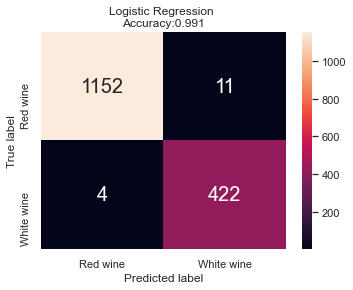

In [67]:
# 7. FINAL EVALUATION: Both Logistic regression and Random forest works equally well. I decided to use the logistic regression as it is simple compared to random forest.

#  Plot the confusion matrix

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_LR) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Red wine','White wine'], 
                     columns = ['Red wine','White wine'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='d',annot_kws={"size": 20})
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_LR)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
# Final conclusion:
# Since the data looks very ideal hence, the Logistic Regression as well as Random Forest gave best result.
